In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
xl = pd.ExcelFile("Error_WholeData_abs.xlsx", engine='openpyxl')
a=xl.sheet_names
#loading the data set
dataframe_collection = {}
i=0
for i in range(1):
        dataframe_collection[i] = xl.parse(a[i])

dataframe_collection[0][dataframe_collection[0]< 0] = 0
df1= dataframe_collection[0][305:801]
df1


,Unnamed: 0,Modelflow,Obsflow,Error,NWM_min,NWM_max,ML_1min,ML_1max,ML_2min,ML_2max
305,305,135.309997,665.445904,146.463661,127.129997,148.369997,0.0,281.773658,0.0,428.237319
306,306,131.149372,611.643895,141.698520,127.359997,137.129997,0.0,272.847892,0.0,414.546413
307,307,126.619997,464.396291,136.511011,123.469997,133.579997,0.0,263.131008,0.0,399.642020
308,308,165.129371,356.792272,180.615836,124.679997,230.939995,0.0,345.745207,0.0,526.361044
309,309,212.179995,281.186291,234.502995,178.039996,246.109994,0.0,446.682990,0.0,681.185984
...,...,...,...,...,...,...,...,...,...,...
796,796,111.987497,139.885224,119.752375,107.069998,125.929997,0.0,231.739872,0.0,351.492247
797,797,107.085623,101.940649,114.138249,105.659998,108.199998,0.0,221.223871,0.0,335.362120
798,798,108.048123,82.968362,115.240629,106.759998,111.979997,0.0,223.288752,0.0,338.529381
799,799,107.571873,100.807975,114.695162,106.479998,108.749998,0.0,222.267035,0.0,336.962197


In [2]:
import numpy as np
res_ML=df1["Obsflow"].between(df1["ML_1min"],df1["ML_1max"])
count_ML = np.count_nonzero(res_ML)
prob_ML=count_ML/len(df1)
prob_ML = round(prob_ML, 2)

res2_ML=df1["Obsflow"].between(df1["ML_2min"],df1["ML_2max"])
count2_ML = np.count_nonzero(res2_ML)
prob2_ML=count2_ML/len(df1)
prob2_ML = round(prob2_ML, 2)

res_NWM=df1["Obsflow"].between(df1["NWM_min"],df1["NWM_max"])
count_NWM= np.count_nonzero(res_NWM)
prob_NWM=count_NWM/len(df1)
prob_NWM = round(prob_NWM, 2)

prob2_ML

0.97

In [3]:
date_to_omit=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 21, 28, 35, 45, 46, 68, 92, 93, 94, 95, 100, 101, 102, 104, 115, 116, 117, 118, 131, 133, 134, 135, 146, 147, 167, 168, 169, 170, 173, 178, 179, 191, 195, 199, 200, 201, 219, 225, 232, 251, 254, 256, 257, 258, 259, 260, 261, 262, 275, 276, 277, 314, 317, 318, 319, 320, 321, 322, 323, 324, 348, 368, 419, 420,421, 446,452, 453, 454, 456, 457, 480, 508, 624, 625, 626, 700,712, 791, 841, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884,885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898,899, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 933,934]
a=pd.date_range(start="2018-12-11",end="2021-08-15").to_list()
print(len(a))

for index in sorted(date_to_omit, reverse=True):
    del a[index]


979


In [4]:
b=pd.to_datetime(a[305:801])
b
df1.index=b

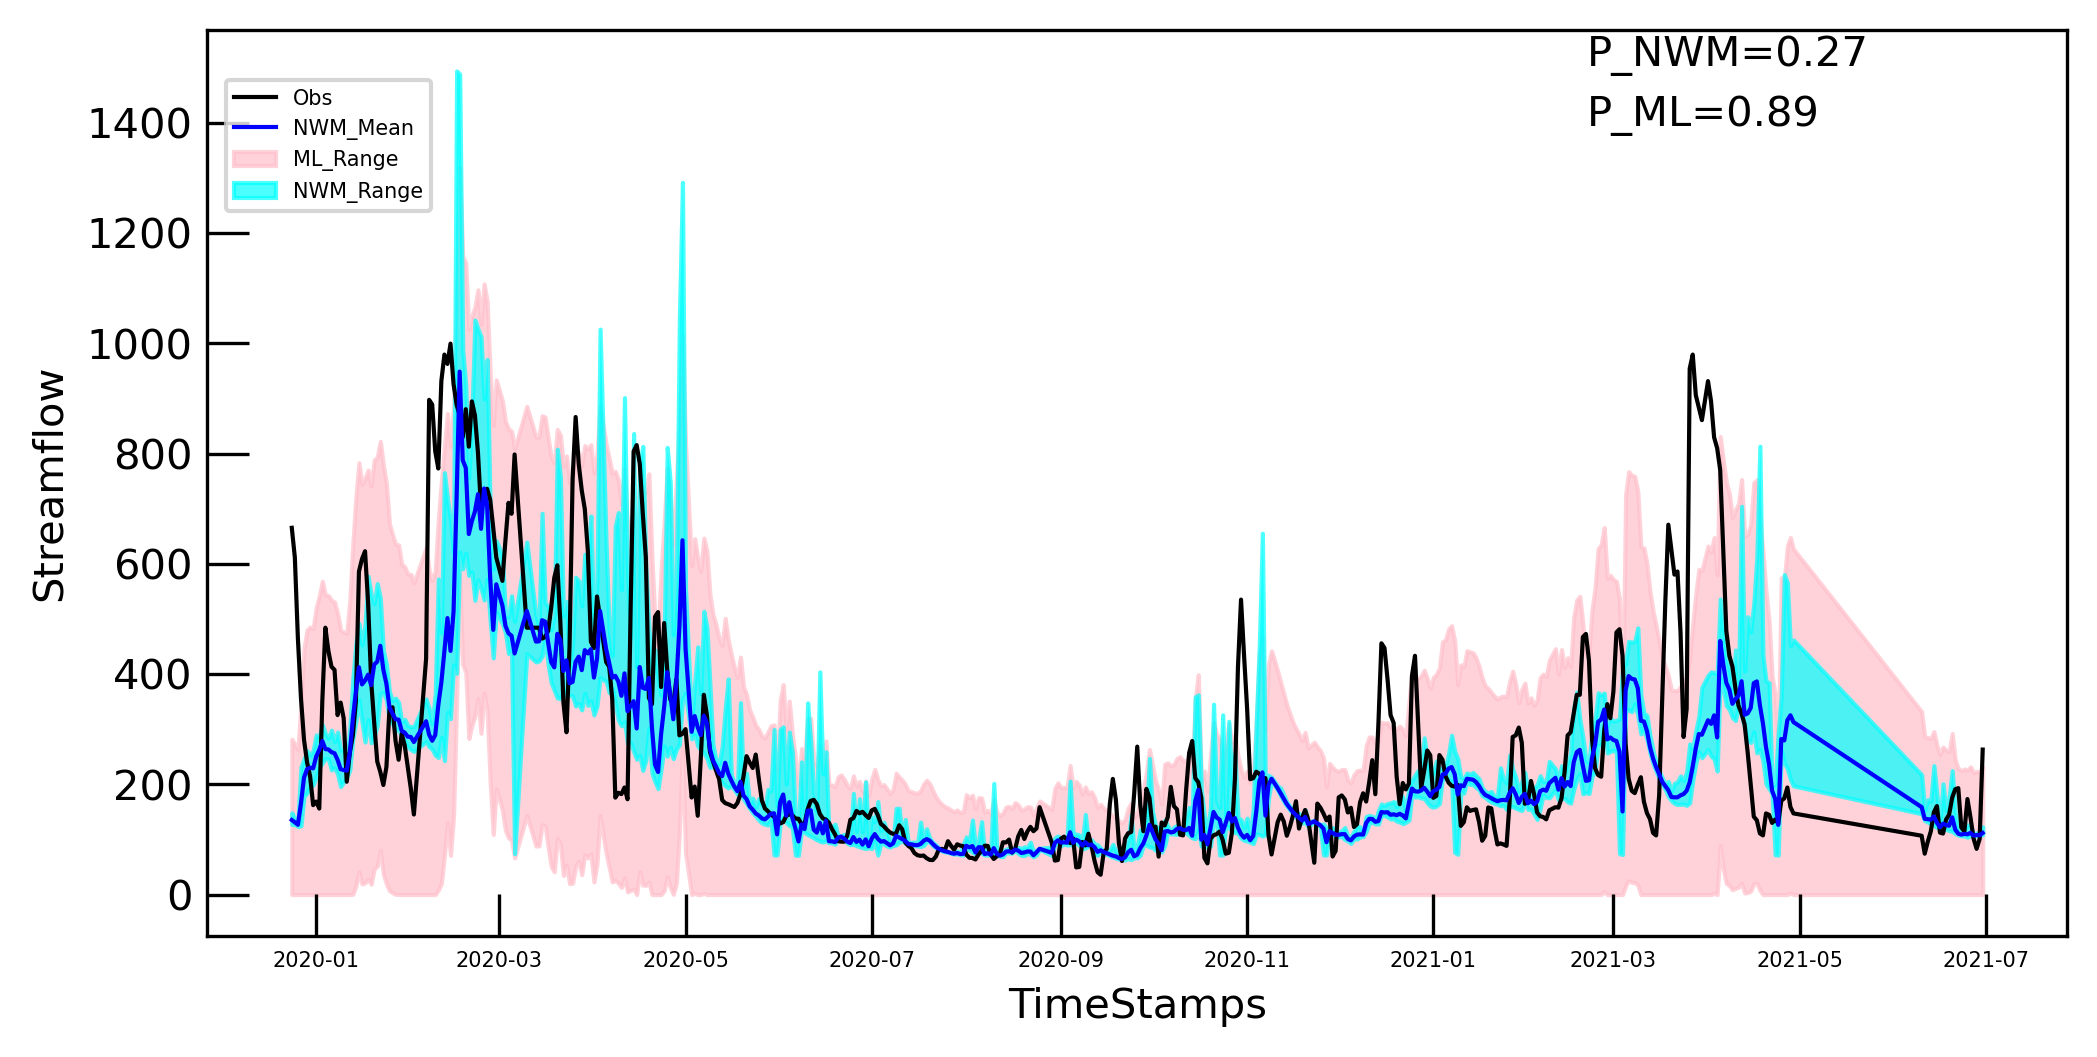

In [6]:
fig = plt.figure(figsize=(3.54,3.54), dpi=300)

plt.plot(df1['Obsflow'], 'k', linewidth=1, label='Obs',alpha=1.0)
plt.plot(df1['Modelflow'], 'b', linewidth=1, label='NWM_Mean',alpha=1.0) 

plt.fill_between(b, df1['ML_1min'],df1['ML_1max'],label='ML_Range',  color='pink', alpha=0.7)
plt.fill_between(b, df1['NWM_min'],df1['NWM_max'],label='NWM_Range',  color='cyan', alpha=0.7)

plt.legend(loc=(0.01, 0.8), fontsize=5)
plt.grid(False)

plt.figtext(.7, .8, "P_ML=%.2f"%(prob_ML))
plt.figtext(.7, .85, "P_NWM=%.2f"%(prob_NWM))

fig.set_size_inches(8, 4)

plt.xlabel("TimeStamps")
plt.ylabel("Streamflow")

#plt.axhline(y=0, color='k',linewidth=2)
#plt.axvline(x=0, color='k',linewidth=2)


plt.tick_params(axis='x',direction='in', length=10,labelsize=5)

plt.tick_params(axis='y',direction='in', length=10)

plt.show()

fig.savefig('fig1_abs_1diff.png',bbox_inches='tight')

In [14]:
prob_NWM

0.19

#2nd Plot


PLOT for 1b

In [7]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_ungagued.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_NWM_0-30.csv',delimiter = ',')

df1["plus"]=df1["Pred"] + df1["Std_err"]
df1["minus"]=df1["Pred"] - df1["Std_err"]
df1[df1< 0] = 0

df2["plus"]=df2["Pred"] + df2["Std_err"]
df2["minus"]=df2["Pred"] - df2["Std_err"]
df2[df2< 0] = 0


df2

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])

df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


In [8]:
df2

,Pred,plus,minus
0,0.108922,0.119034,0.098810
1,0.081345,0.086974,0.075715
2,0.083126,0.087657,0.078594
3,0.089196,0.093675,0.084717
4,0.099794,0.104725,0.094864
5,0.110042,0.115439,0.104644
6,0.122083,0.128166,0.115999
7,0.135673,0.142523,0.128823
8,0.149939,0.157418,0.142459
9,0.163606,0.171630,0.155583


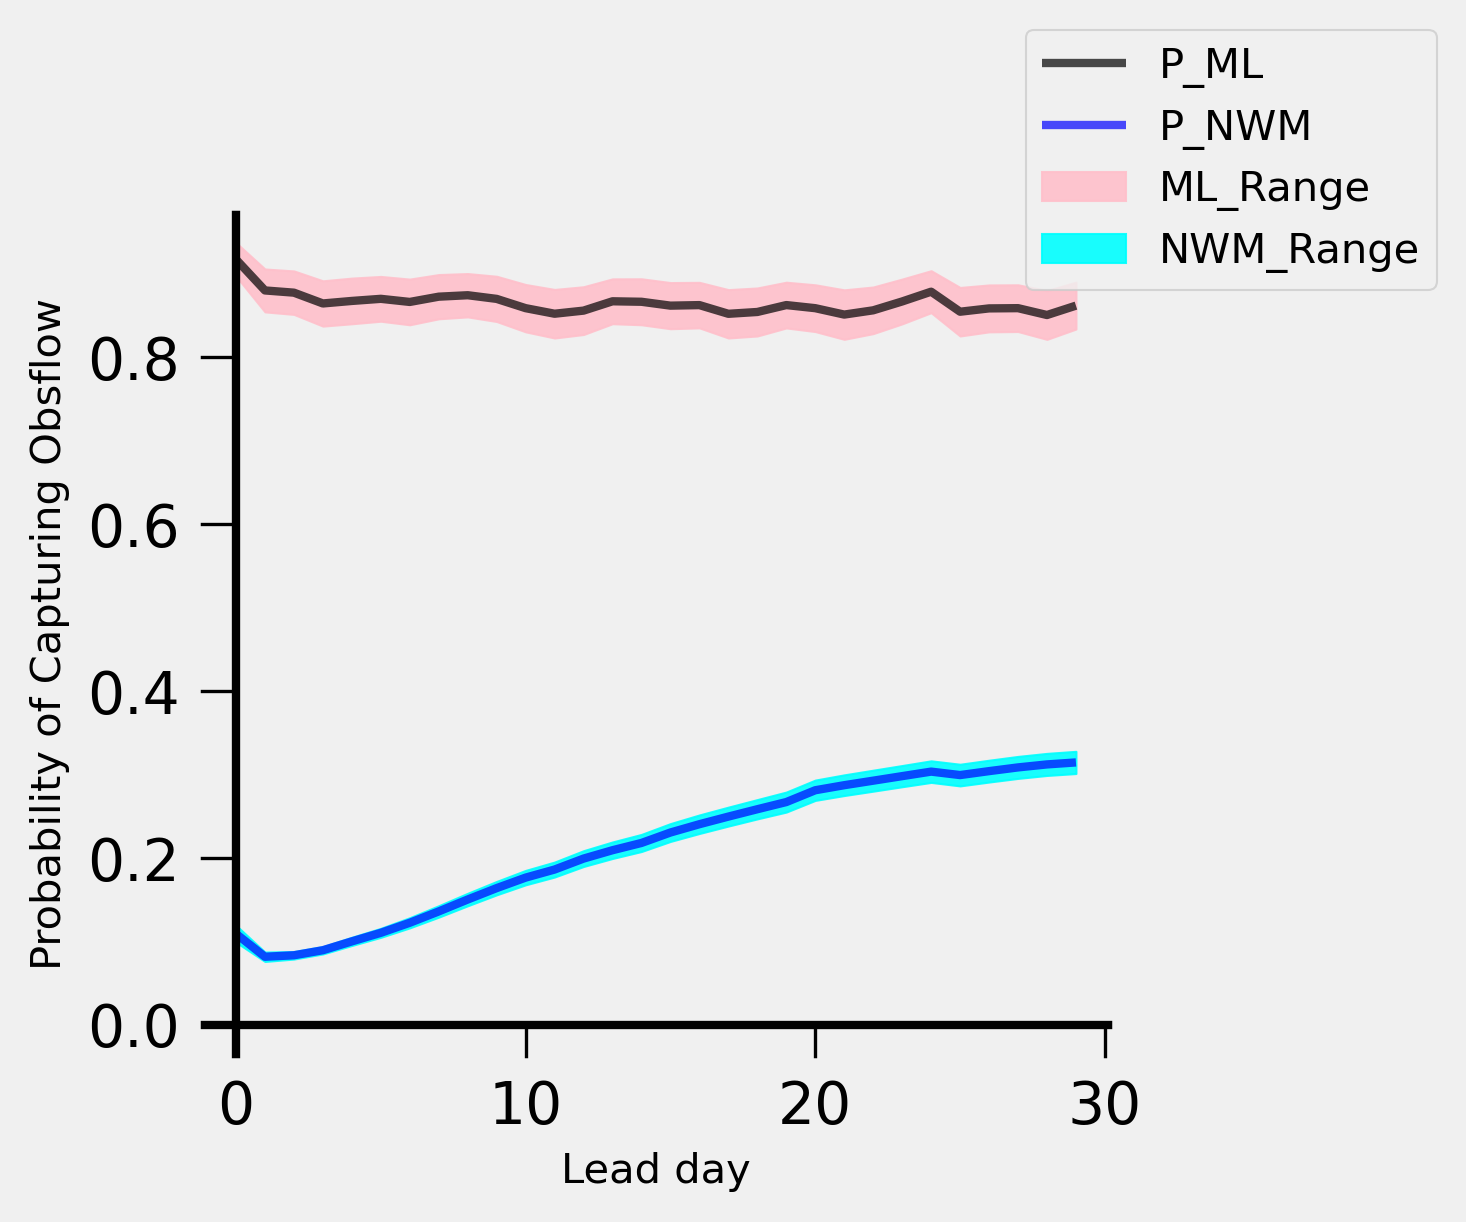

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'k', linewidth=2, label='P_ML',alpha=0.7)
plt.plot(df2['Pred'], 'b', linewidth=2, label='P_NWM',alpha=0.7) 
plt.fill_between(df1.index, df1['plus'],df1['minus'],label='ML_Range',  color='pink', alpha=0.9)
plt.fill_between(df1.index, df2['plus'],df2['minus'],label='NWM_Range',  color='cyan', alpha=0.9)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)
plt.axhline(y=0, color='k',linewidth=2)
plt.axvline(x=0, color='k',linewidth=2)


plt.tick_params(axis='x',direction='in', length=10)

plt.tick_params(axis='y',direction='in', length=10)

fig.savefig('fig2.png', bbox_inches='tight')

plt.grid(False)
plt.show()


#3rd Graph


In [14]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_lnd1.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_lnd2.csv',delimiter = ',')
df3 = pd.read_csv('prediction_std_stderr_probability_lnd3.csv',delimiter = ',')

df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df3['prob_plus'] = df3['Pred']+df3['Std_err']
df3['prob_minus'] = df3['Pred']-df3['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])
df3=df3.drop(columns=[df3.columns[0],df3.columns[2],df3.columns[3]])

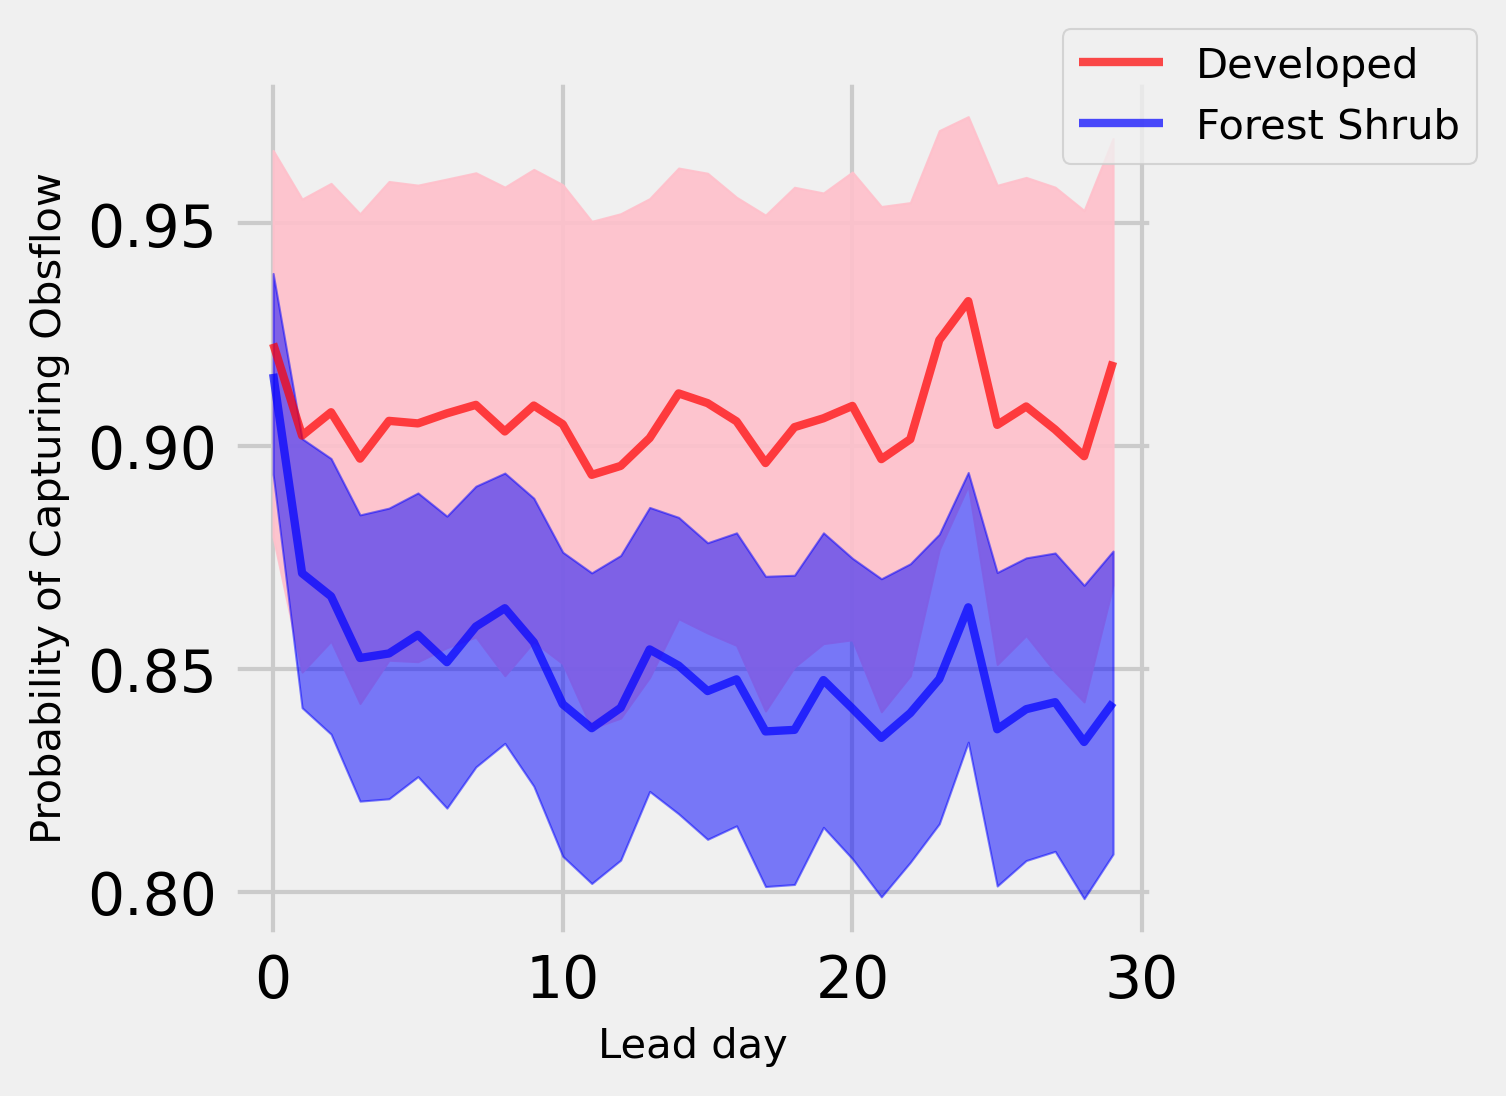

In [15]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3.54,3.54), dpi=300)
plt.plot(df1['Pred'], 'r', linewidth=2, label='Developed',alpha=0.7)
plt.plot(df3['Pred'], 'b', linewidth=2, label='Forest Shrub',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='pink', alpha=0.9)
plt.fill_between(df3.index, df3['prob_plus'],df3['prob_minus'],  color='b', alpha=0.5)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)

plt.show()
fig.savefig('fig3.png', bbox_inches='tight')

In [16]:
import pandas as pd 

df1 = pd.read_csv('prediction_std_stderr_probability_less_2.5.csv',delimiter = ',')
df2 = pd.read_csv('prediction_std_stderr_probability_grt.csv',delimiter = ',')


df1['prob_plus'] = df1['Pred']+df1['Std_err']
df1['prob_minus'] = df1['Pred']-df1['Std_err']

df2['prob_plus'] = df2['Pred']+df1['Std_err']
df2['prob_minus'] = df2['Pred']-df1['Std_err']

df1=df1.drop(columns=[df1.columns[0],df1.columns[2],df1.columns[3]])
df2=df2.drop(columns=[df2.columns[0],df2.columns[2],df2.columns[3]])


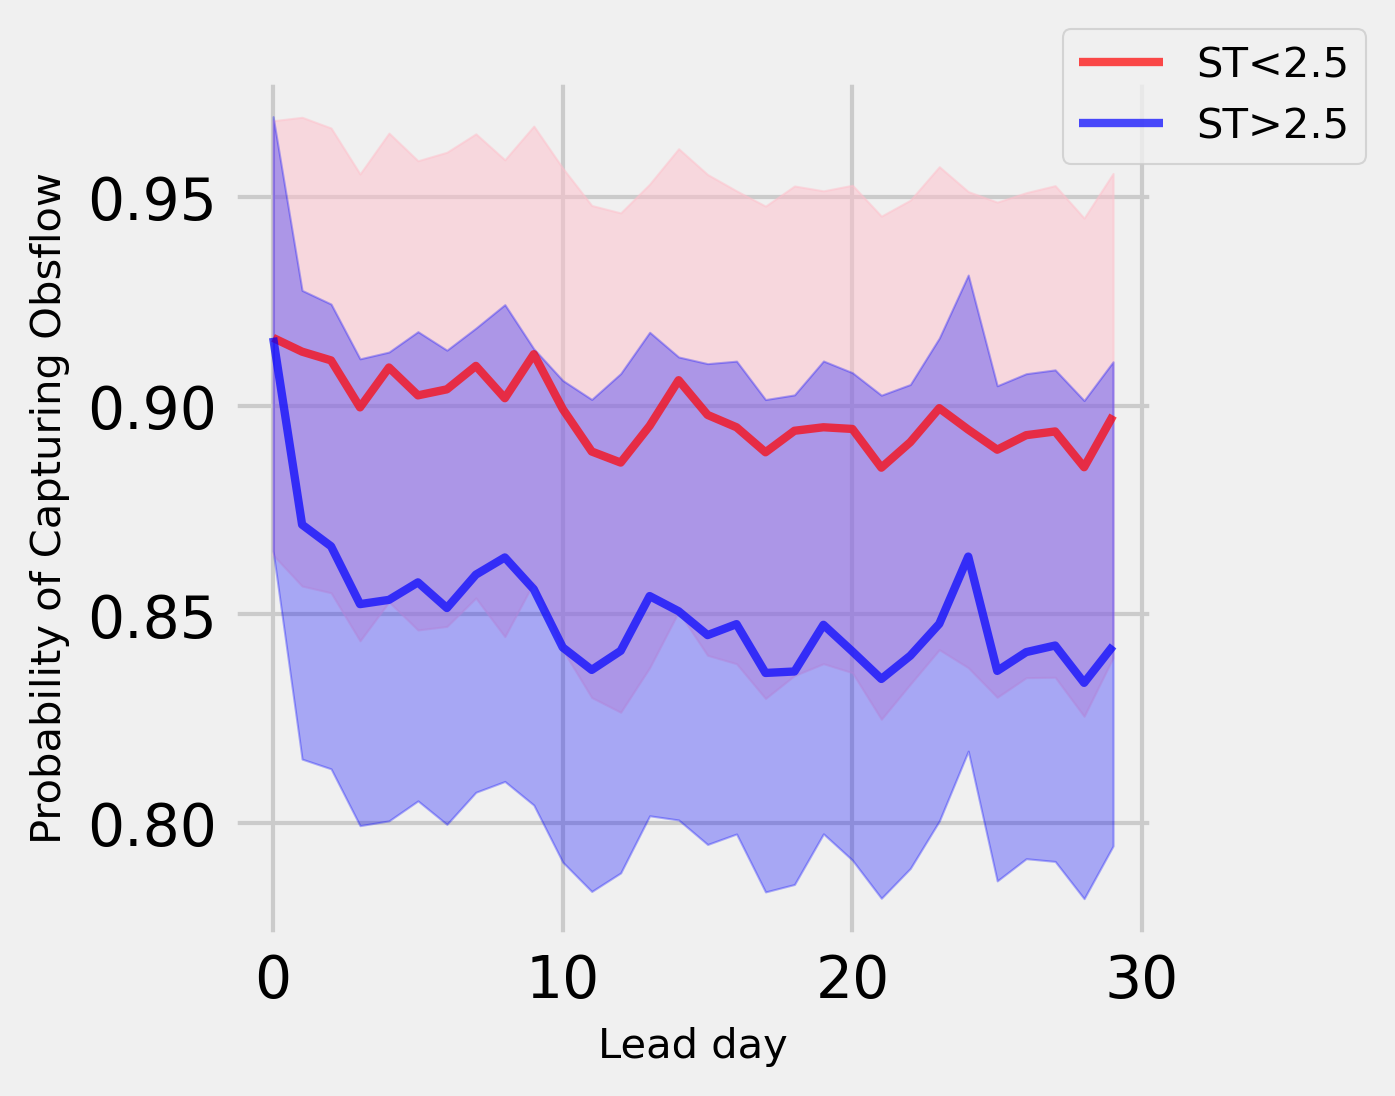

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')


fig = plt.figure(figsize=(3.54,3.54),dpi=300)
plt.plot(df1['Pred'], 'r', linewidth=2, label='ST<2.5',alpha=0.7)
plt.plot(df3['Pred'], 'b', linewidth=2, label='ST>2.5',alpha=0.7)

plt.fill_between(df1.index, df1['prob_plus'],df1['prob_minus'],  color='pink', alpha=0.5)
plt.fill_between(df2.index, df2['prob_plus'],df2['prob_minus'],  color='blue', alpha=0.3)
plt.legend(loc=(0.9, 0.9), fontsize=10)
plt.xlabel("Lead day",fontsize=10)
plt.ylabel("Probability of Capturing Obsflow",fontsize=10)

plt.show()
fig.savefig('fig4.png', bbox_inches='tight')